In [53]:
# Import the dependencies
import numpy as np
from scipy.linalg import toeplitz, cholesky, sqrtm, inv
# import scipy.linalg as la
from scipy import signal
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
print("Imports done")


Imports done


In [111]:
# Setting up the time data:
dt = 0.005; # integration step, average neuron resets 200 times per second
T = 5+dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points
v = 30
Sigma_real = 1
x = np.zeros(N)
mu = np.zeros(N)
e = np.zeros(N)


In [55]:
print(vSigma[0])

1.0


In [56]:
def makeNoise(C,s2,t):
    
    if np.size(C)== 1:
        n = 1
    else:
        n = C.shape[1]  # dimension of noise
        
    # Create the white noise with correct covariance
    N = np.size(t)      # number of elements
    L = cholesky(C, lower=True)  #Cholesky method
    w = np.dot(L,np.random.randn(n,N))
    
    if s2 <= 1e-5: # return white noise
        return w
    else: 
        # Create the noise with temporal smoothness
        P = toeplitz(np.exp(-t**2/(2*s2)))
        F = np.diag(1./np.sqrt(np.diag(np.dot(P.T,P))))
        K = np.dot(P,F)
        ws = np.dot(w,K)
        return ws

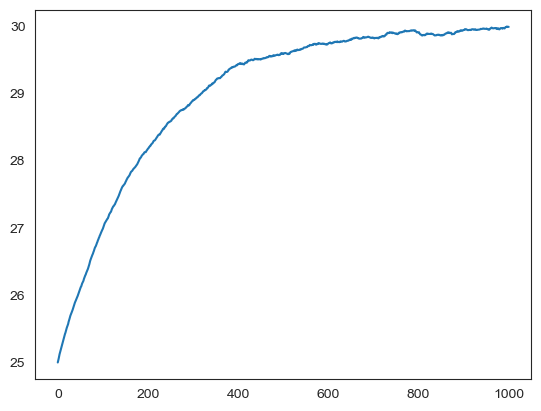

In [144]:
from statistics import mean, variance

Sigma = np.zeros(N)
Sigma[0] = 4

for i in np.arange(0,N-1):
    x[i] = v + np.random.randn(1)*Sigma_real
    mu[0] = 25   
    e[i] = x[i] - mu[i]
    
    omega = 1/Sigma[i]
    domega = 0.5*(Sigma[i] - e[i]**2)
    omega = omega + dt*domega
    Sigma[i+1] = 1/omega

    dmu = 1/Sigma_real*e[i] #EVEN EXPERIMENTEREN MET SIGMA_REAL OF SIGMA[I]
    
    mu[i+1] = mu[i] + dt*dmu
    



# for i in np.arange(0,N-1):
#     x[i] = v + np.random.randn(1)*vSigma[i]
#     mu[i] =v
    
#     e[i] = x[i] - mu[i]
#     omega = 1/vSigma[i]
#     domega = 0.5*(vSigma[i] - e[i]**2) 
#     omega = omega + dt*domega
#     vSigma[i+1] = 1/omega


# plt.plot(x)
# plt.plot(mu)
# plt.plot(e)
# plt.plot(Sigma)
plt.plot(mu)





In [58]:
print(x)

[29.39646174 30.90748634 30.32749629 ... 31.86553837 32.1802552
  0.        ]


In [59]:
for i = 1:N:
    omega = 1/Sigma
    domega = 0.5(1/omega - e^2)

SyntaxError: invalid syntax (432195485.py, line 1)